# Business Analytics with Python CEP Sales Analysis - Amit Gengaje 26/12/2024

#### 1. Prepare Data for Analysis

In [181]:
import pandas as pd #import pandas library 

In [183]:
df = pd.DataFrame() #create a dataframe

In [185]:
df = pd.read_csv('Sales.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})
# Read the csv file and store it as a DataFrame named df

/var/folders/cs/0g16kzs169l8lj2xftfw4s800000gn/T/ipykernel_21735/1106768295.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Sales.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})


In [187]:
df #Print the DataFrame df and determine its dimensions

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TX,Seniors,14,35000
7556,2020-12-30,Evening,TX,Kids,15,37500
7557,2020-12-30,Evening,TX,Men,15,37500
7558,2020-12-30,Evening,TX,Women,11,27500


In [189]:
df.isnull().sum() #Check for missing values in the DataFrame

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [191]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


#### 2. Normalize Data for Analysis

In [193]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler #import necessary libraries for Normalization

In [195]:
#Create a new DataFrame called df_dataonly from the existing df object with Unit and Sales as 1st and 2nd columns.
df_dataonly = df[['Unit','Sales']]

In [197]:
normalize = MinMaxScaler() #Create a normalize object

In [199]:
#Create a new object called normalize_data to invoke the fit_transform() method and pass the newly created df_dataonly object. 

normalize_data = normalize.fit_transform(df_dataonly) 

In [201]:
normalize_data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

#### 2.5 Check - Min should be 0.0 and max 1.0 for Unit and Sales columns.
##### normalize_data[:, 0] refers to the first column (Unit) of the normalized data.
##### normalize_data[:, 1] refers to the second column (Sales).

In [203]:
# Check the min and max values of the normalized data
print("Min of Unit (normalized):", normalize_data[:, 0].min())
print("Max of Unit (normalized):", normalize_data[:, 0].max())
print("Min of Sales (normalized):", normalize_data[:, 1].min())
print("Max of Sales (normalized):", normalize_data[:, 1].max())

Min of Unit (normalized): 0.0
Max of Unit (normalized): 0.9999999999999999
Min of Sales (normalized): 0.0
Max of Sales (normalized): 1.0


#### 3. Visualize Overall Trends

In [205]:
df_grouped = df.groupby('Date')[['Unit', 'Sales']].sum() #Group relevant columns to sum Unit and Sales for plotting

<Axes: title={'center': 'Date vs Units'}, xlabel='Date', ylabel='Units'>

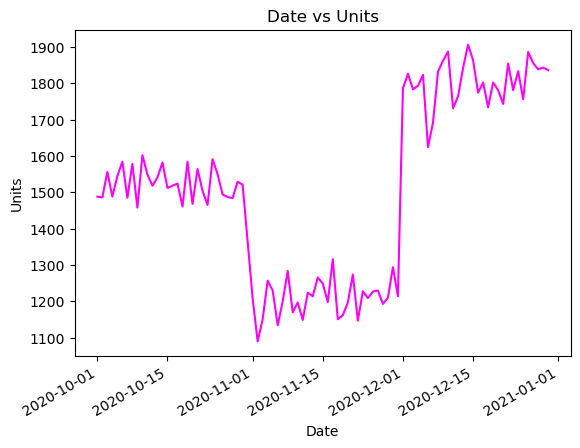

In [207]:
df_grouped['Unit'].plot(title='Date vs Units', xlabel='Date',ylabel='Units', color='magenta') #Plot the Date versus Unit line chart

<Axes: title={'center': 'Date vs Sales'}, xlabel='Date', ylabel='Sales'>

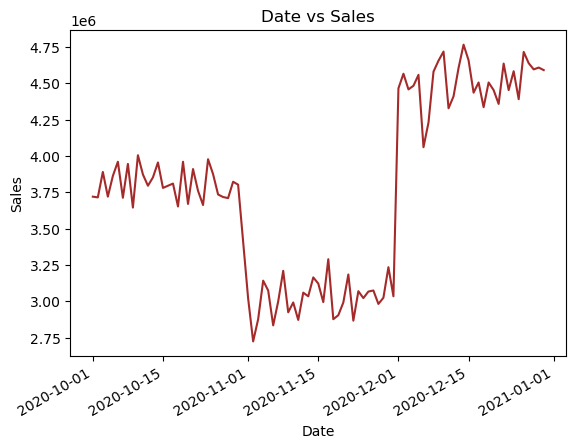

In [209]:
df_grouped['Sales'].plot(title='Date vs Sales', xlabel='Date',ylabel='Sales', color='brown') #Plot the Date versus Sales line chart

##### Analytical Observation: The Overall Sales figures and Unit figures suggest the data varies quite similarly over time in each plot as seen by the almost identical lines. It can therefore be reasoned Unit and Sales figures are closely related. 

#### 4. Analyze Monthly Data

In [219]:
df_grouped #Check to ensure the Date column is set as index for getting sub-DataFrames

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
...,...,...
2020-12-26,1886,4715000
2020-12-27,1855,4637500
2020-12-28,1838,4595000


In [221]:
df_oct = df_grouped.loc['2020-10-01':'2020-10-31']
df_oct #For each month, get the sub-DataFrame and pass the range by date

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
2020-10-06,1584,3960000
2020-10-07,1485,3712500
2020-10-08,1578,3945000
2020-10-09,1458,3645000


In [89]:
df_nov = df_grouped.loc['2020-11-01':'2020-11-30']
df_nov #For each month, get the sub-DataFrame and pass the range by date

,Unit,Sales
Date,,
2020-11-01,1208,3020000
2020-11-02,1090,2725000
2020-11-03,1151,2877500
2020-11-04,1257,3142500
2020-11-05,1230,3075000
2020-11-06,1134,2835000
2020-11-07,1200,3000000
2020-11-08,1284,3210000
2020-11-09,1170,2925000


In [91]:
df_dec = df_grouped.loc['2020-12-01':'2020-12-31']
df_dec #For each month, get the sub-DataFrame and pass the range by date

,Unit,Sales
Date,,
2020-12-01,1786,4465000
2020-12-02,1826,4565000
2020-12-03,1783,4457500
2020-12-04,1793,4482500
2020-12-05,1823,4557500
2020-12-06,1624,4060000
2020-12-07,1692,4230000
2020-12-08,1832,4580000
2020-12-09,1862,4655000


#### 5. Describe Data

In [93]:
df_oct.describe() #Describe data for each month

,Unit,Sales
count,30.000000,3.000000e+01
mean,1523.866667,3.809667e+06
std,43.041867,1.076047e+05
min,1458.000000,3.645000e+06
25%,1487.250000,3.718125e+06
50%,1519.500000,3.798750e+06
75%,1554.500000,3.886250e+06
max,1602.000000,4.005000e+06


In [95]:
df_nov.describe() #Describe data for each month

,Unit,Sales
count,30.000000,3.000000e+01
mean,1209.100000,3.022750e+06
std,51.177413,1.279435e+05
min,1090.000000,2.725000e+06
25%,1175.750000,2.939375e+06
50%,1209.500000,3.023750e+06
75%,1230.000000,3.075000e+06
max,1316.000000,3.290000e+06


In [97]:
df_dec.describe() #Describe data for each month

,Unit,Sales
count,30.000000,3.000000e+01
mean,1804.400000,4.511000e+06
std,61.370329,1.534258e+05
min,1624.000000,4.060000e+06
25%,1775.750000,4.439375e+06
50%,1812.500000,4.531250e+06
75%,1842.750000,4.606875e+06
max,1906.000000,4.765000e+06


#### 6. Analyze Unit Data

<Axes: title={'center': 'Oct Units Box Plot'}>

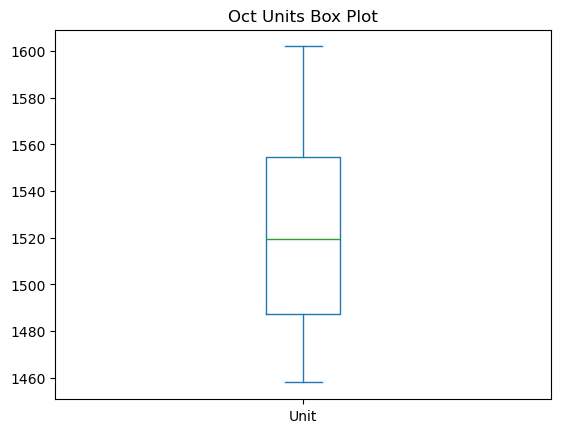

In [99]:
df_oct['Unit'].plot(kind='box',title='Oct Units Box Plot') #Use boxplots to visualize the distribution of units sold for each month

##### Analytical Observation: Since this box is longer in length, there is more variability in data indicating a wider distribution.

<Axes: title={'center': 'Nov Units Box Plot'}>

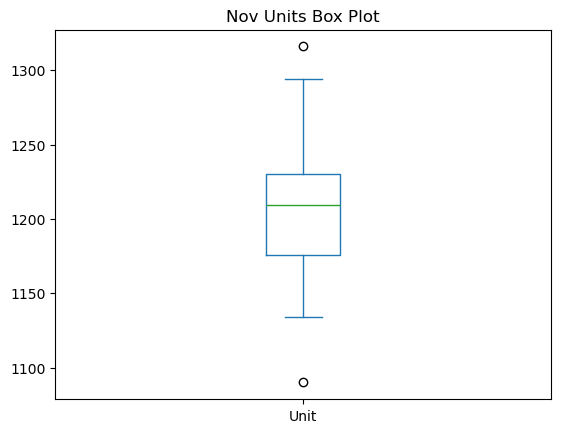

In [101]:
df_nov['Unit'].plot(kind='box',title='Nov Units Box Plot') #Use boxplots to visualize the distribution of units sold for each month

##### Analytical Observation: The median line is closer to Q3 at the top of the box, meaning the data is skewed. We can also see outliers at the top and bottom of the box plot; however, the distance between the outlier and the rest of the data is greatest below the minimum point.

<Axes: title={'center': 'Dec Units Box Plot'}>

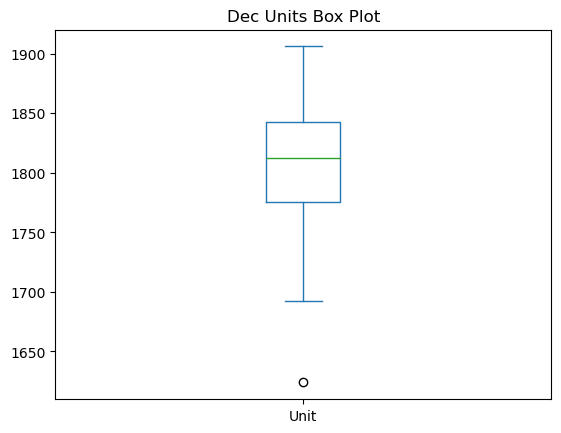

In [103]:
df_dec['Unit'].plot(kind='box',title='Dec Units Box Plot') #Use boxplots to visualize the distribution of units sold for each month

##### Analytical Observation: Since this box is shorter in length, there is less variability which indicates more closely-clustered data with the exception of an outlier.

#### 6.2 Analyze Sales Data

<Axes: title={'center': 'Oct Sales Box Plot'}>

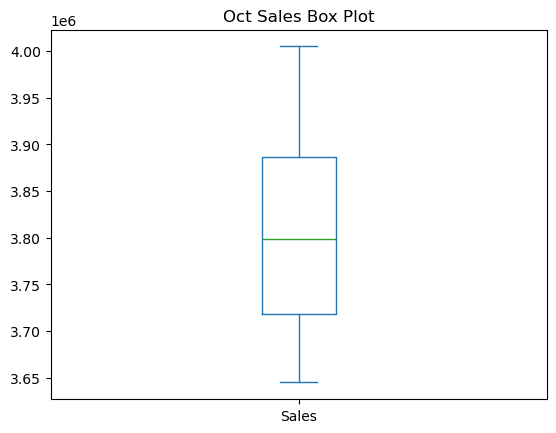

In [105]:
df_oct['Sales'].plot(kind='box',title='Oct Sales Box Plot') #Use boxplots to visualize the distribution of Sales for each month

##### Analytical Observation: The median is placed in the middle of the box which represents the data is not skewed towards any direction. 

<Axes: title={'center': 'Nov Sales Box Plot'}>

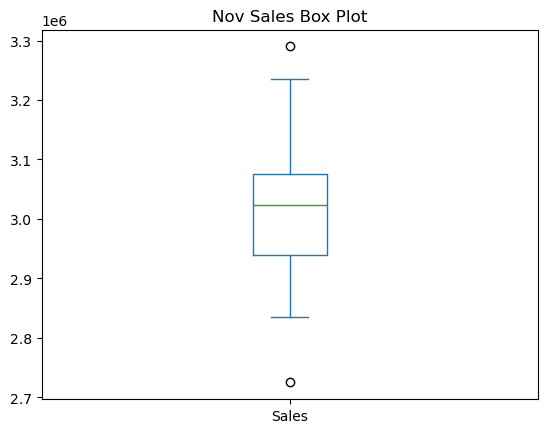

In [107]:
df_nov['Sales'].plot(kind='box',title='Nov Sales Box Plot') #Use boxplots to visualize the distribution of Sales for each month

##### Analytical Observation: There are outliers in the data outside the max and min points; however, the distance between the outlier and the rest of the data is greatest below the minimum point suggesting more of a left skew. 

<Axes: title={'center': 'Dec Sales Box Plot'}>

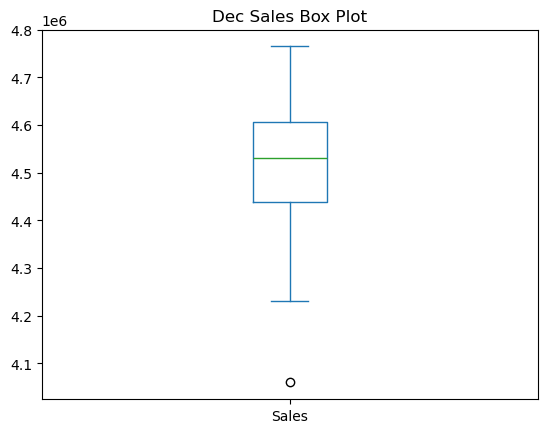

In [109]:
df_dec['Sales'].plot(kind='box',title='Dec Sales Box Plot') #Use boxplots to visualize the distribution of Sales for each month

##### Analytical Observation: This box plot is negatively skewed due to an outlier present below the minimum point while most of the data in the IQR is not so widely distributed.

#### 7. Explore Monthly Plots and Analysis

<Axes: title={'center': 'Overall Unit Figures'}, xlabel='Date', ylabel='Unit'>

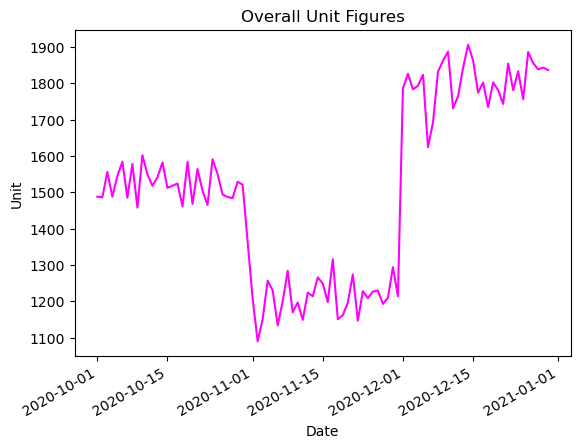

In [111]:
df_grouped['Unit'].plot(color='magenta',title='Overall Unit Figures',xlabel='Date',ylabel='Unit') #Plot overall unit figures

<Axes: title={'center': 'Overall Sales Figures'}, xlabel='Date', ylabel='Sales'>

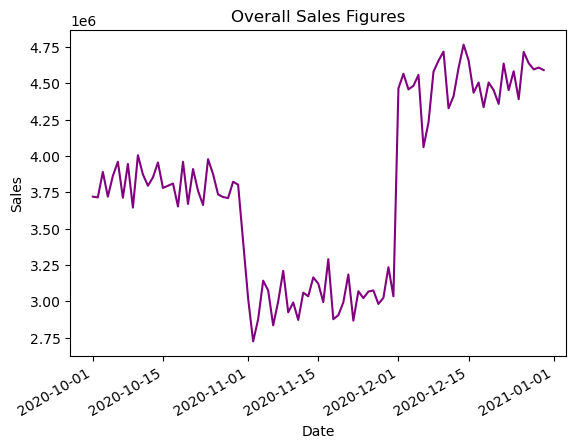

In [113]:
df_grouped['Sales'].plot(color='purple',title='Overall Sales Figures',xlabel='Date',ylabel='Sales') #Plot overall Sales figures

##### Analytical Observation: These Overal Unit and Sales plots are exactly the same as the plots in Step 3 due to a repeated requirement in the CEP PS.

<Axes: title={'center': 'Oct Units Sold'}, xlabel='Date', ylabel='Unit'>

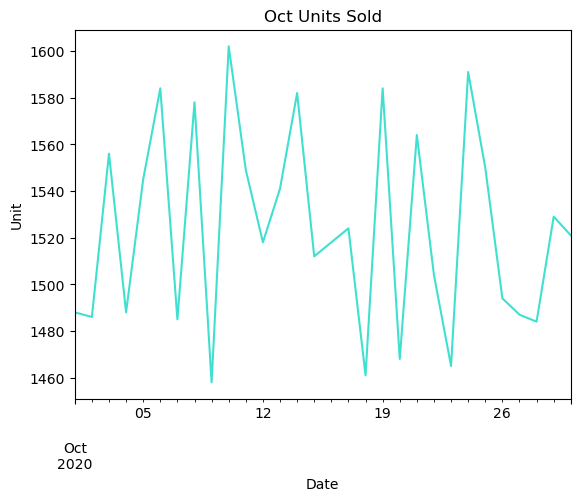

In [115]:
df_oct['Unit'].plot(color='turquoise',title='Oct Units Sold',xlabel='Date',ylabel='Unit') #Units sold in Oct

<Axes: title={'center': 'Nov Units Sold'}, xlabel='Date', ylabel='Unit'>

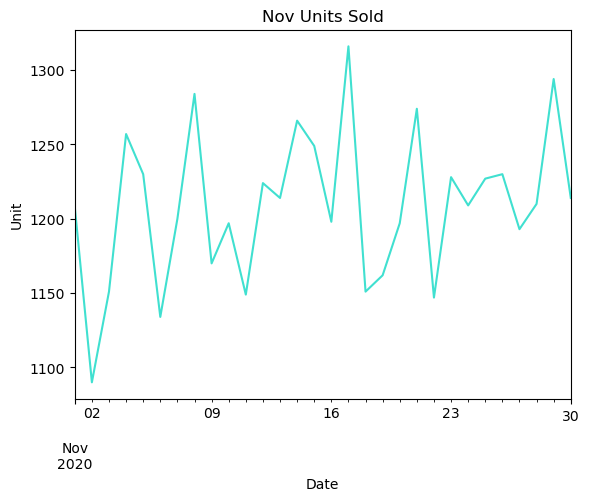

In [117]:
df_nov['Unit'].plot(color='turquoise',title='Nov Units Sold',xlabel='Date',ylabel='Unit')  #Units sold in Nov

<Axes: title={'center': 'Dec Units Sold'}, xlabel='Date', ylabel='Unit'>

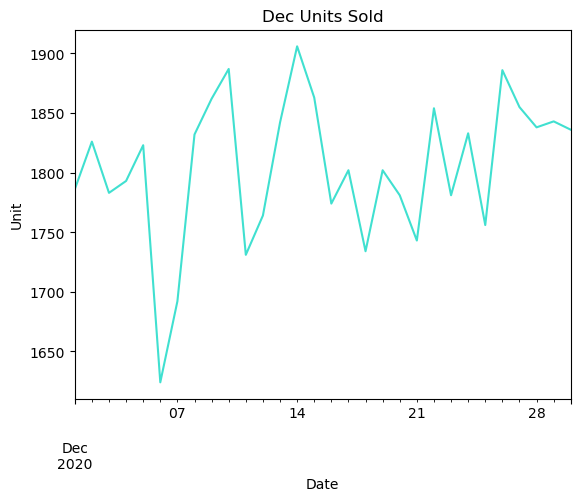

In [119]:
df_dec['Unit'].plot(color='turquoise',title='Dec Units Sold',xlabel='Date',ylabel='Unit')  #Units sold in Dec

<Axes: title={'center': 'Oct Sales Figures'}, xlabel='Date', ylabel='Sales'>

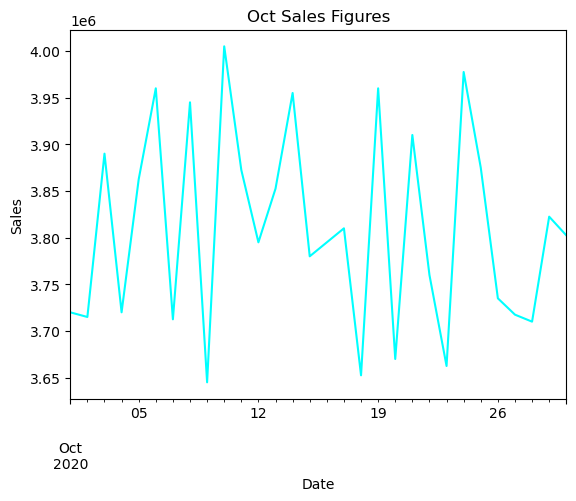

In [121]:
df_oct['Sales'].plot(color='cyan',title='Oct Sales Figures',xlabel='Date',ylabel='Sales')  #Sales Figures in Oct

<Axes: title={'center': 'Nov Sales Figures'}, xlabel='Date', ylabel='Sales'>

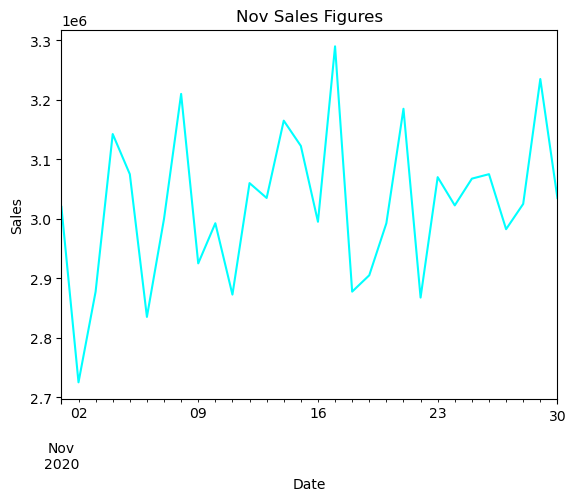

In [123]:
df_nov['Sales'].plot(color='cyan',title='Nov Sales Figures',xlabel='Date',ylabel='Sales') #Sales Figures in Nov

<Axes: title={'center': 'Dec Sales Figures'}, xlabel='Date', ylabel='Sales'>

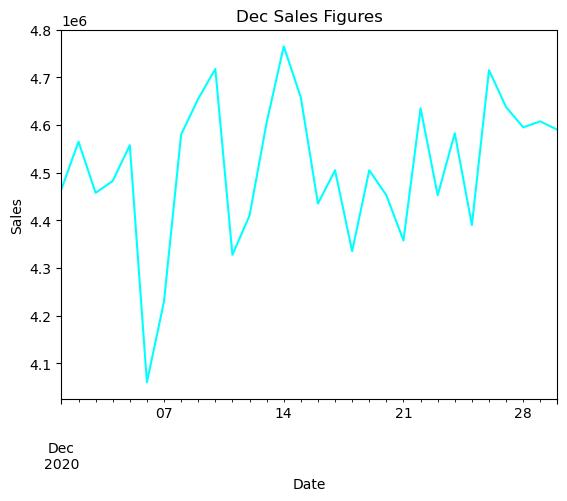

In [125]:
df_dec['Sales'].plot(color='cyan',title='Dec Sales Figures',xlabel='Date',ylabel='Sales') #Sales Figures in Dec

#### 8. Obtain a Comprehensive Snapshot

In [468]:
import seaborn as sns 

In [484]:
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/cs/0g16kzs169l8lj2xftfw4s800000gn/T/ipykernel_9781/1757927099.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp_oct.set_xticklabels(bp_oct.get_xticklabels(), rotation=45, ha='right')
/var/folders/cs/0g16kzs169l8lj2xftfw4s800000gn/T/ipykernel_9781/1757927099.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp_nov.set_xticklabels(bp_nov.get_xticklabels(), rotation=45, ha='right')
/var/folders/cs/0g16kzs169l8lj2xftfw4s800000gn/T/ipykernel_9781/1757927099.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp_dec.set_xticklabels(bp_dec.get_xticklabels(), rotation=45, ha='right')
/var/folders/cs/0g16kzs169l8lj2xftfw4s800000gn/T/ipykernel_9781/1757927099.py:23: UserWarning: set_ticklabels() should only be used with a fix

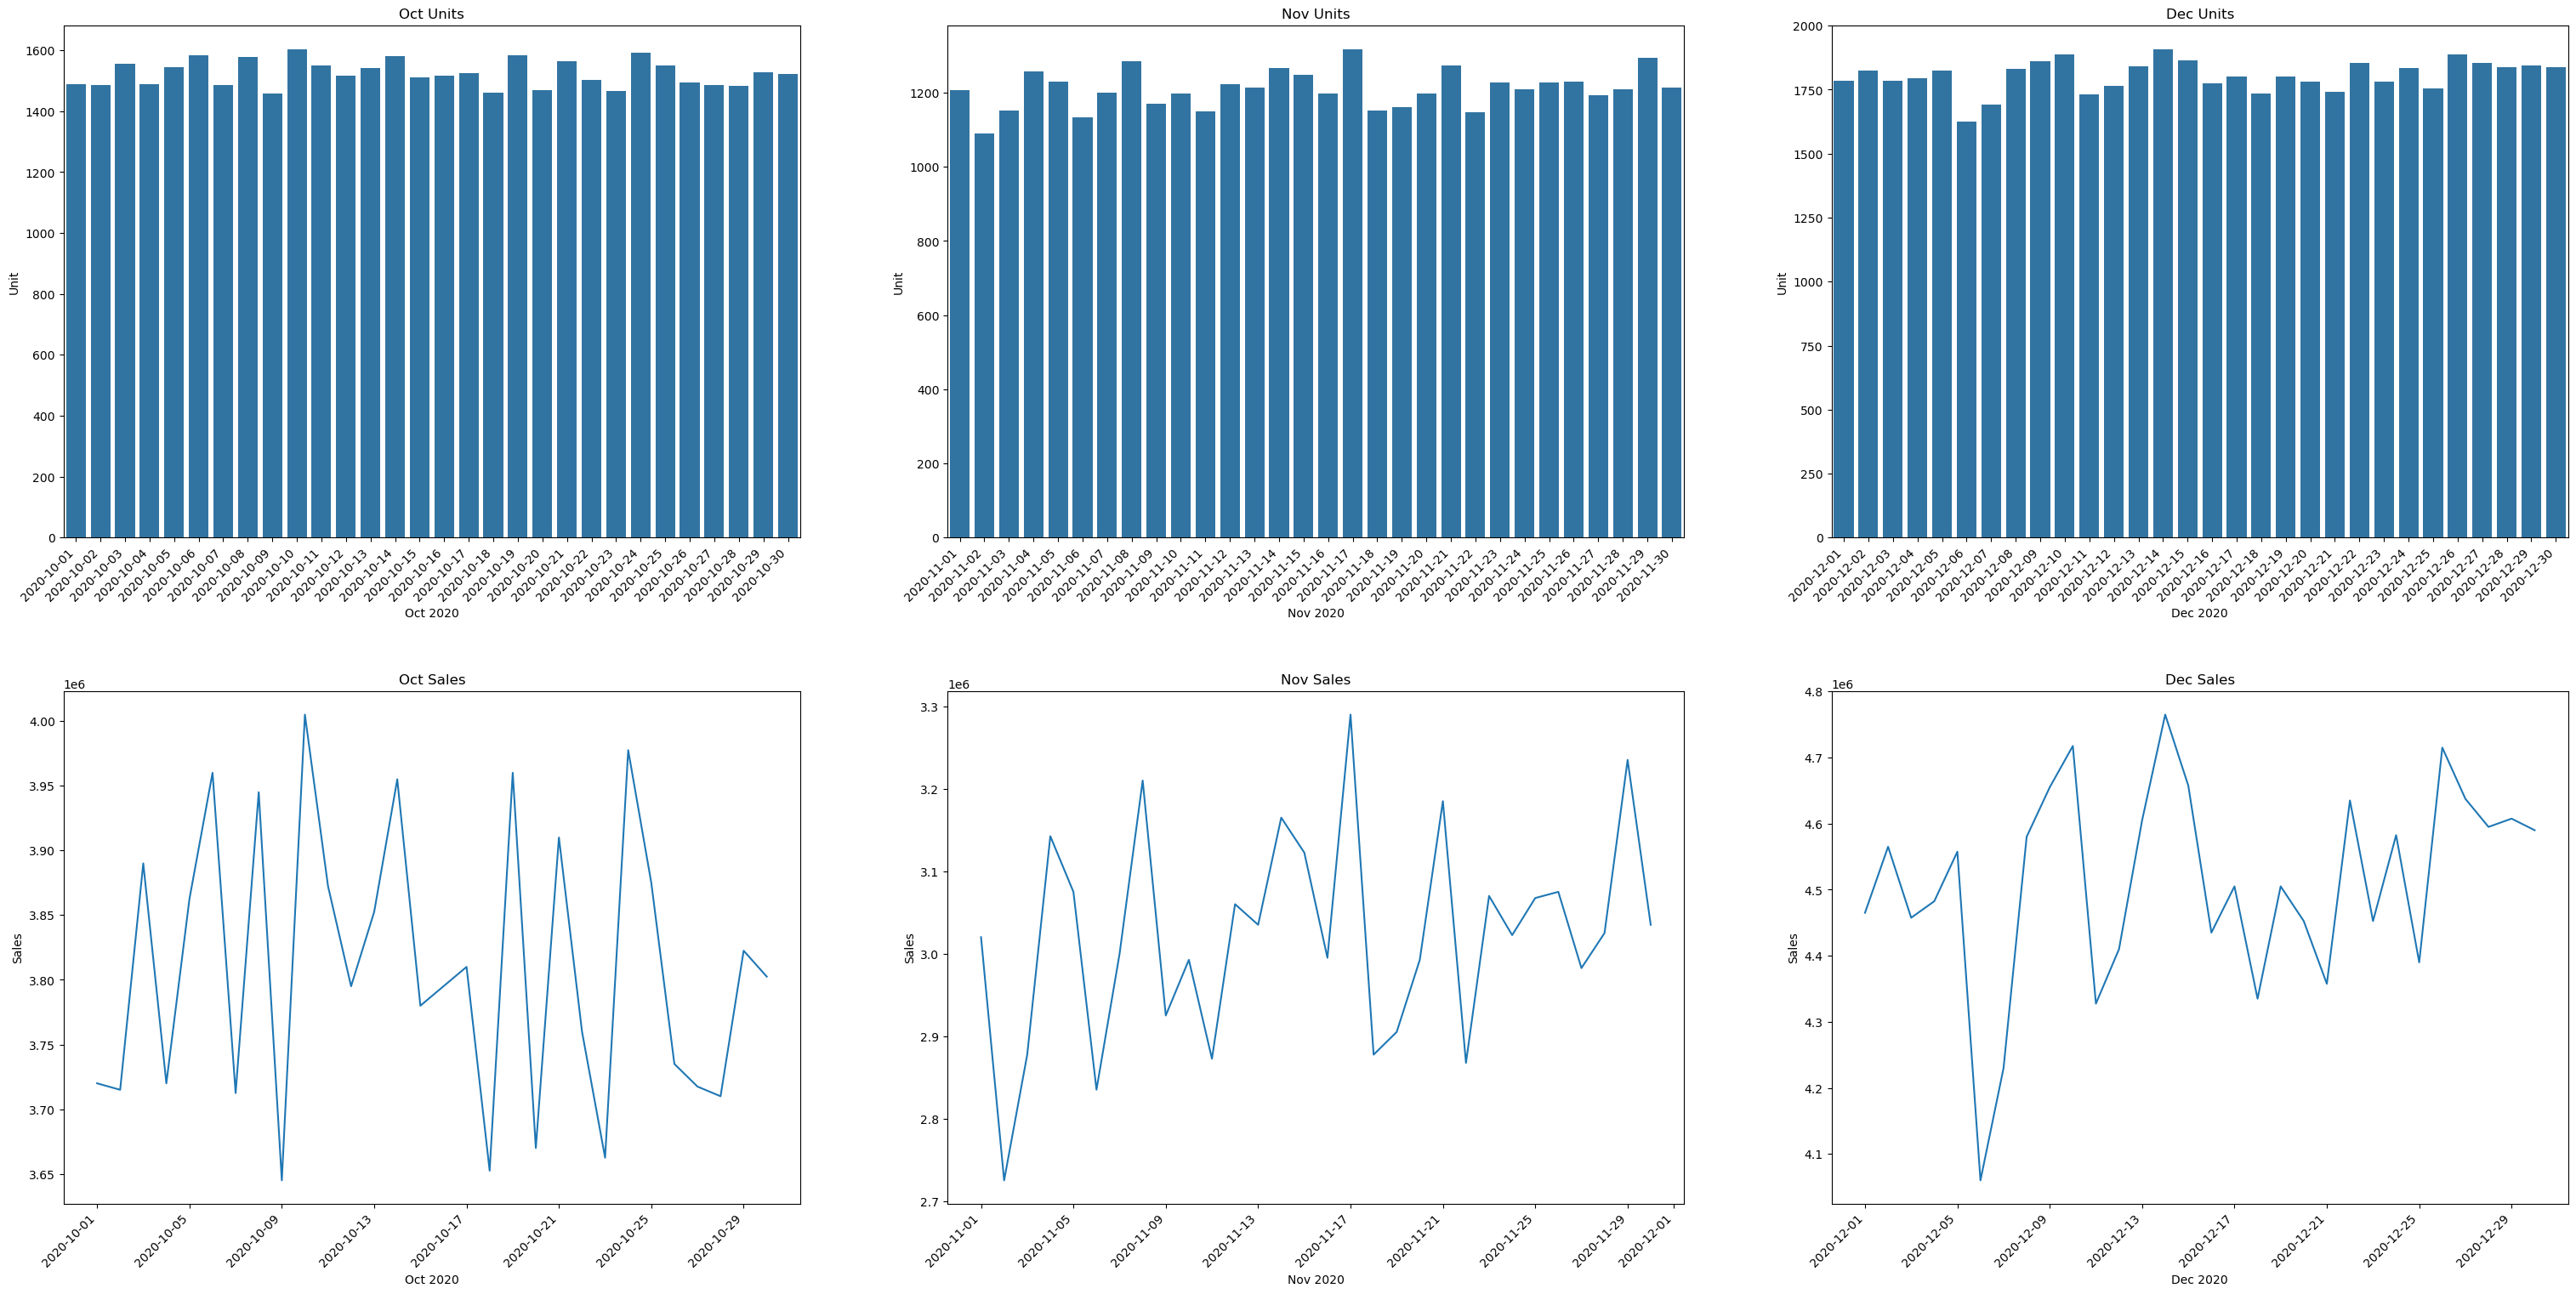

In [679]:
fig, axes = plt.subplots(2, 3, figsize=(38, 18))

bp_oct = sns.barplot(x = df_oct.index, y='Unit', data=df_oct, ax=axes[0,0])
bp_nov = sns.barplot(x = df_nov.index, y='Unit', data=df_nov, ax=axes[0,1])
bp_dec = sns.barplot(x = df_dec.index, y='Unit', data=df_dec, ax=axes[0,2])

bp_oct.set(xlabel='Oct 2020', title='Oct Units')
bp_nov.set(xlabel='Nov 2020', title='Nov Units') 
bp_dec.set(xlabel='Dec 2020', title='Dec Units')

bp_oct.set_xticklabels(bp_oct.get_xticklabels(), rotation=45, ha='right')
bp_nov.set_xticklabels(bp_nov.get_xticklabels(), rotation=45, ha='right')
bp_dec.set_xticklabels(bp_dec.get_xticklabels(), rotation=45, ha='right')

lp_oct = sns.lineplot(x= df_oct.index, y='Sales', data=df_oct, ax=axes[1,0])
lp_nov =  sns.lineplot(x= df_nov.index, y='Sales', data=df_nov, ax=axes[1,1])
lp_dec =  sns.lineplot(x= df_dec.index, y='Sales', data=df_dec, ax=axes[1,2])

lp_oct.set(xlabel='Oct 2020', title='Oct Sales')
lp_nov.set(xlabel='Nov 2020', title='Nov Sales') 
lp_dec.set(xlabel='Dec 2020', title='Dec Sales')

lp_oct.set_xticklabels(lp_oct.get_xticklabels(), rotation=45, ha='right')
lp_nov.set_xticklabels(lp_nov.get_xticklabels(), rotation=45, ha='right')
lp_dec.set_xticklabels(lp_dec.get_xticklabels(), rotation=45, ha='right')

plt.subplots_adjust(hspace=0.3, wspace=0.2)

plt.show()

##### Analytical Observation: The Snapshot Overview suggests there is less variability in the Units plots indicating good consistency while the Sales plots suggest the values rise and fall more.

#### 9. Statewise Analysis

In [127]:
df_statewise = df.groupby('State')[['Sales']].sum() #Analyse Statewise sales in the US Step 1

<Axes: title={'center': 'Statewise Sales'}, xlabel='State', ylabel='Sales'>

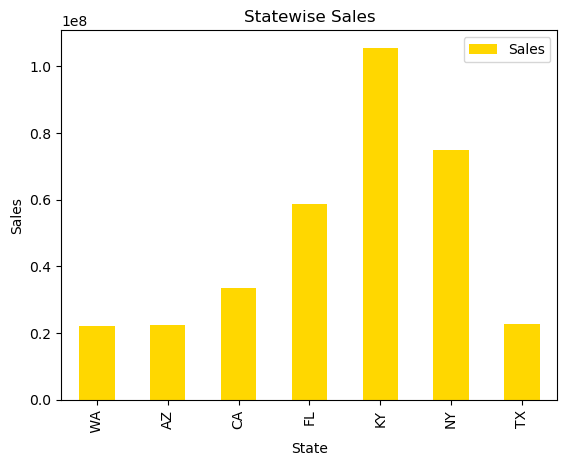

In [129]:
df_statewise.plot(kind='bar',title='Statewise Sales',xlabel='State',ylabel='Sales', color='gold') #Analyse Statewise sales in the US Step 2

##### Analytical Observation: The Statewise Sales plot suggests Kentucky has the most sales while Washington has the least sales from Oct - Dec 2020 therefore it would be prudent to study the factors that have contributed to sales success in Kentucky and try to improve low-sales states accordingly. 

#### 10. Groupwise Analysis

In [131]:
df_groupwise = df.groupby('Group')[['Sales']].sum() #Conduct Groupwise Analysis Step 1

<Axes: title={'center': 'Groupwise Sales'}, xlabel='Group', ylabel='Sales'>

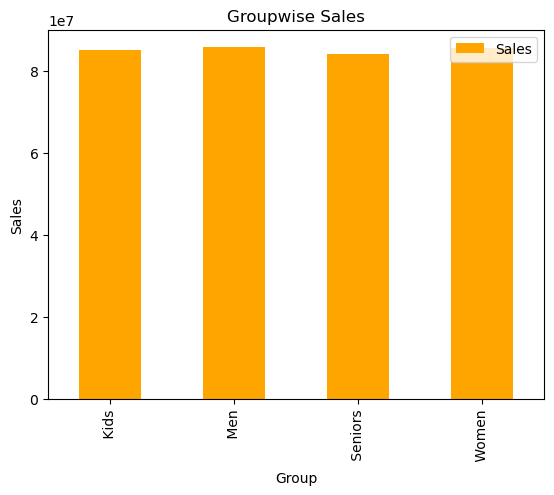

In [133]:
df_groupwise.plot(kind='bar',title='Groupwise Sales',xlabel='Group',ylabel='Sales', color='orange') #Conduct Groupwise Analysis Step 2

##### Analytical Observation: The Groupwise Sales plot suggests the data is closely clustered around the average meaning there is less variability in all groups. It can therefore be said that sales across all groups are fairly consitent due to steady demand.  

#### 11. Timewise Analysis

In [135]:
df_timewise = df.groupby('Time')[['Sales']].sum() #Explore Timewise Analysis Step 1

<Axes: title={'center': 'Timewise Sales'}, xlabel='Time of Day', ylabel='Sales'>

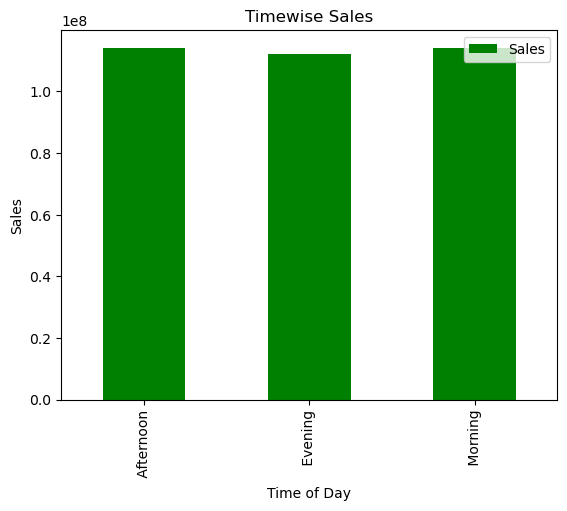

In [137]:
df_timewise.plot(kind='bar',title='Timewise Sales',xlabel='Time of Day',ylabel='Sales', color='green') #Explore Timewise Analysis Step 2

##### Analytical Observation: The Timewise Sales plot suggests there is almost no deviation from the average across all times in the day. We can assume the standard deviation value will be smaller as a result meaning these values are predictable and can be used to consistently forecast sales accurately. 

#### To the assessor(s) evaluating this CEP, I wish you a Happy New Year ahead! ✨